In [28]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import xgboost as xgb # The model for forecasting
from sklearn.metrics import mean_squared_error

In [29]:
df = pd.read_csv("train.csv")
df = df.set_index('timestamp')

In [30]:
df.index = pd.to_datetime(df.index, format='ISO8601')
df = df.sort_index()
df.head()

,starttime,endtime,machineid,batchkey,commandno,stepno,prgno,fabric_weight,command_repetition,kk_level,...,kk_irtibat_valve,slow_dosage_valve,bk_level,bk_dosage_valve,dosage_curve_type,kk_bk_common_discharge,kk_target_level,bk_target_level,kk_mikser_robotu,bk_mikser_robotu
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-08-13 04:14:50.573000+00:00,2025-08-13 07:14:50,2025-08-13 07:15:48,105,125450,19,2,86,485,0,0.12,...,True,False,9.61,False,0,False,0.0,0.0,False,False
2025-08-13 04:14:51.572000+00:00,2025-08-13 07:14:50,2025-08-13 07:15:48,105,125450,19,2,86,485,0,0.19,...,True,False,9.53,False,0,False,0.0,0.0,False,False
2025-08-13 04:14:52.572000+00:00,2025-08-13 07:14:50,2025-08-13 07:15:48,105,125450,19,2,86,485,0,0.12,...,True,False,9.53,False,0,False,0.0,0.0,False,False
2025-08-13 04:14:53.574000+00:00,2025-08-13 07:14:50,2025-08-13 07:15:48,105,125450,19,2,86,485,0,0.19,...,True,False,9.53,False,0,False,0.0,0.0,False,False
2025-08-13 04:14:54.574000+00:00,2025-08-13 07:14:50,2025-08-13 07:15:48,105,125450,19,2,86,485,0,0.12,...,True,False,9.53,False,0,False,0.0,0.0,False,False


In [36]:
df.tail()

,starttime,endtime,machineid,batchkey,commandno,stepno,prgno,fabric_weight,command_repetition,kk_level,...,kk_irtibat_valve,slow_dosage_valve,bk_level,bk_dosage_valve,dosage_curve_type,kk_bk_common_discharge,kk_target_level,bk_target_level,kk_mikser_robotu,bk_mikser_robotu
timestamp,,,,,,,,,,,,,,,,,,,,,
2026-02-13 03:33:06.662000+00:00,2026-02-13 06:22:56,2026-02-13 06:34:12,243,144194,22,7,1080,200,0,0.0,...,False,False,0.0,True,0,False,0.0,1.0,False,False
2026-02-13 03:33:07.772000+00:00,2026-02-13 06:22:56,2026-02-13 06:34:12,243,144194,22,7,1080,200,0,0.0,...,False,False,0.0,True,0,False,0.0,1.0,False,False
2026-02-13 03:33:08.884000+00:00,2026-02-13 06:22:56,2026-02-13 06:34:12,243,144194,22,7,1080,200,0,0.0,...,False,False,0.0,True,0,False,0.0,1.0,False,False
2026-02-13 03:33:09.995000+00:00,2026-02-13 06:22:56,2026-02-13 06:34:12,243,144194,22,7,1080,200,0,0.0,...,False,False,0.0,True,0,False,0.0,1.0,False,False
2026-02-13 03:33:11.105000+00:00,2026-02-13 06:22:56,2026-02-13 06:34:12,243,144194,22,7,1080,200,0,0.0,...,False,False,0.0,False,0,False,0.0,1.0,False,False


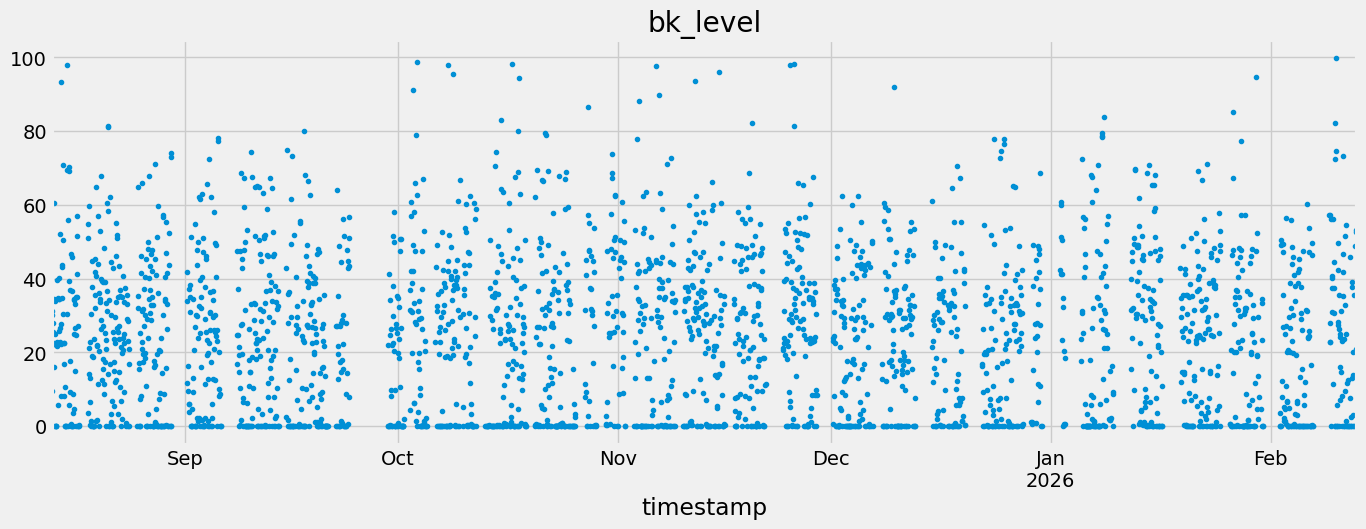

In [35]:
df_resampled = df['bk_level'].resample('1h').mean()

df_resampled.plot(style='.', 
                  figsize=(15, 5), 
                  color=color_pal[0], 
                  title='bk_level')

plt.show()

# Feature Creation

In [40]:
df.index

DatetimeIndex(['2025-08-13 04:14:50.573000+00:00',
               '2025-08-13 04:14:51.572000+00:00',
               '2025-08-13 04:14:52.572000+00:00',
               '2025-08-13 04:14:53.574000+00:00',
               '2025-08-13 04:14:54.574000+00:00',
               '2025-08-13 04:14:55.577000+00:00',
               '2025-08-13 04:14:56.575000+00:00',
               '2025-08-13 04:14:57.574000+00:00',
               '2025-08-13 04:14:58.575000+00:00',
               '2025-08-13 04:14:59.575000+00:00',
               ...
               '2026-02-13 03:33:01.105000+00:00',
               '2026-02-13 03:33:02.222000+00:00',
               '2026-02-13 03:33:03.327000+00:00',
               '2026-02-13 03:33:04.438000+00:00',
               '2026-02-13 03:33:05.549000+00:00',
               '2026-02-13 03:33:06.662000+00:00',
               '2026-02-13 03:33:07.772000+00:00',
               '2026-02-13 03:33:08.884000+00:00',
               '2026-02-13 03:33:09.995000+00:00',
            

In [41]:
df.columns

Index(['starttime', 'endtime', 'machineid', 'batchkey', 'commandno', 'stepno',
       'prgno', 'fabric_weight', 'command_repetition', 'kk_level',
       'bk_irtibat_valve', 'fast_dosage_valve', 'ak_level', 'kk_dosage_valve',
       'kk_irtibat_valve', 'slow_dosage_valve', 'bk_level', 'bk_dosage_valve',
       'dosage_curve_type', 'kk_bk_common_discharge', 'kk_target_level',
       'bk_target_level', 'kk_mikser_robotu', 'bk_mikser_robotu'],
      dtype='str')

In [ ]:
def create_features(df):
    df = df.copy()

    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['weekofyear'] = df.index.isocalendar().week

    return df

df = create_features(df)

# Visualize our Feature / Target Relationship

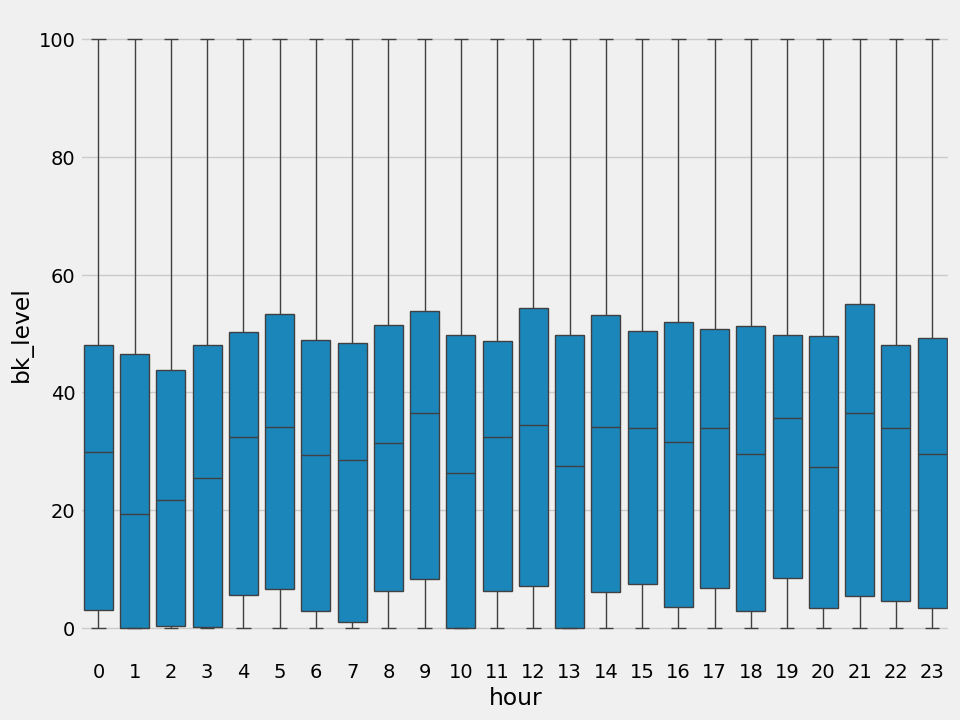

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='bk_level')
plt.show()

# Time Series Cross Validation

In [54]:
from sklearn.model_selection import TimeSeriesSplit

In [58]:
train = create_features(df)
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df= df.sort_index()

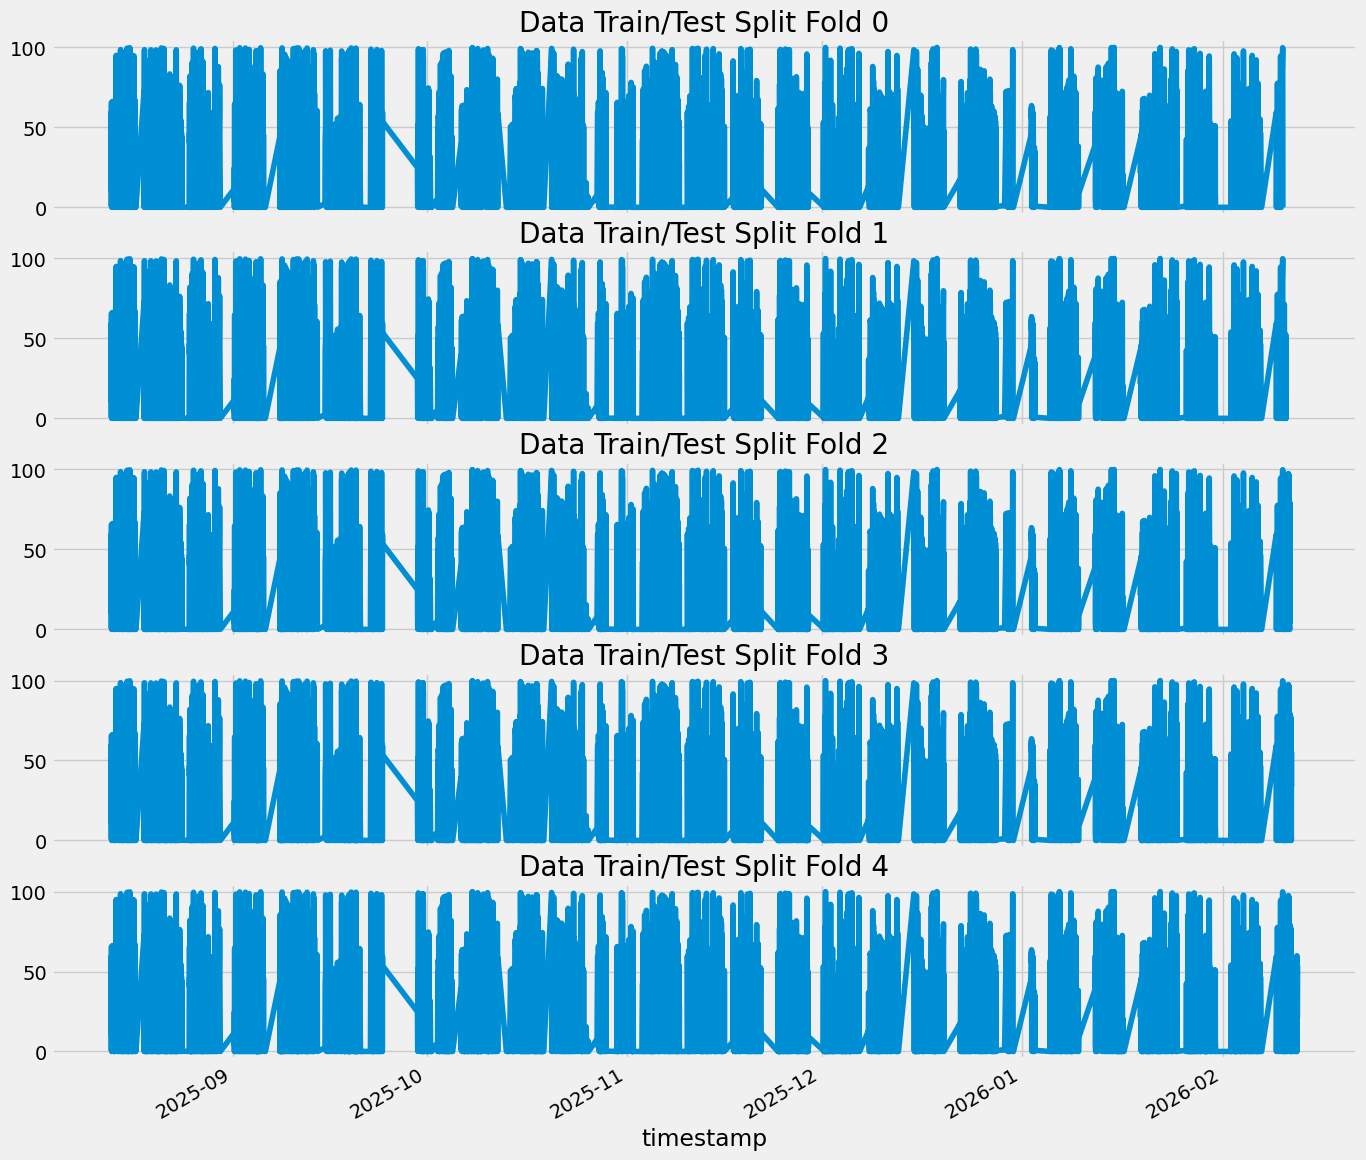

In [59]:
# plot and see it
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    
    train['bk_level'].iloc[::100].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    fold += 1

plt.show()